In [1]:
import sys

assert sys.version_info.major is 3

In [2]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt
import os
import subprocess

print("Tensorflow version: {}".format(tf.__version__))

Tensorflow version: 2.5.0


In [3]:
fashion_mnist = keras.datasets.fashion_mnist

In [4]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [5]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [6]:
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1)
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)

In [7]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [8]:
model = keras.Sequential([
    keras.layers.Conv2D(input_shape=(28, 28, 1), filters=8, kernel_size=3, strides=2, activation='relu', name='conv1'),
    keras.layers.Flatten(),
    keras.layers.Dense(10, name='Dense')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1 (Conv2D)               (None, 13, 13, 8)         80        
_________________________________________________________________
flatten (Flatten)            (None, 1352)              0         
_________________________________________________________________
Dense (Dense)                (None, 10)                13530     
Total params: 13,610
Trainable params: 13,610
Non-trainable params: 0
_________________________________________________________________


In [9]:
epochs = 5
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=[keras.metrics.SparseCategoricalAccuracy()])
model.fit(train_images, train_labels, epochs=epochs)

Epoch 1/5
1875/1875 [==============================] - 6s 2ms/step - loss: 0.5445 - sparse_categorical_accuracy: 0.8109

In [10]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print("Test accuracy: {}".format(test_acc))

313/313 [==============================] - 0s 827us/step - loss: 0.3698 - sparse_categorical_accuracy: 0.8699
Test accuracy: 0.8698999881744385


In [11]:
import tempfile

MODEL_DIR = './fashion_mnist'
version = 1
export_path = os.path.join(MODEL_DIR, str(version))
print("export_path={}".format(export_path))

export_path=./fashion_mnist/1


In [12]:
tf.keras.models.save_model(
    model,
    export_path,
    overwrite=True,
    include_optimizer=True,
    save_format=None,
    signatures=None,
    options=None
)

INFO:tensorflow:Assets written to: ./fashion_mnist/1/assets


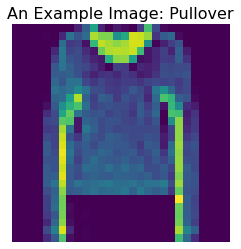

In [13]:
def show(idx, title):
    plt.figure()
    plt.imshow(test_images[idx].reshape(28, 28))
    plt.axis('off')
    plt.title('{}'.format(title), fontdict={'size': 16})

import random
rando = random.randint(0, len(test_images)-1)
show(rando, "An Example Image: {}".format(class_names[test_labels[rando]]))

In [14]:
import json
data = json.dumps({"signature_name": "serving_default", "instances": test_images[0:3].tolist()})

In [15]:
data

'{"signature_name": "serving_default", "instances": [[[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0]], [[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0]], [[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0]], [[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0]], [[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0],

In [16]:
print("Data: {} ... {}".format(data[:50], data[len(data)-52:]))

Data: {"signature_name": "serving_default", "instances": ...  [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0]]]]}


In [17]:
import requests
headers = {"content-type": "application/json"}
json_response = requests.post('http://localhost:8501/v1/models/fashion_mnist:predict', data=data, headers=headers)

In [18]:
predictions = json.loads(json_response.text)["predictions"]

In [19]:
predictions

[[-7.17394638,
  -10.5014582,
  -6.18986702,
  -5.49014664,
  -6.29970598,
  1.56756198,
  -3.91418719,
  2.93274546,
  -0.0874613,
  6.82654428],
 [-4.40508032,
  -18.5630512,
  2.86898851,
  -7.92609358,
  -2.52664852,
  -33.9557381,
  -2.22602081,
  -39.0712662,
  -8.31574631,
  -26.9229527],
 [-5.92874146,
  10.2257614,
  -9.31124592,
  -0.725223362,
  -2.27824688,
  -21.4253464,
  -9.66058445,
  -19.8964787,
  -10.2420683,
  -20.8287621]]

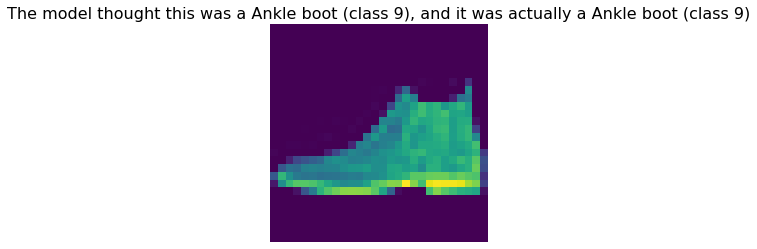

In [20]:
show(0, "The model thought this was a {} (class {}), and it was actually a {} (class {})".format(class_names[np.argmax(predictions[0])], np.argmax(predictions[0]), class_names[test_labels[0]], test_labels[0]))

In [21]:
headers = {"content-type": "application/json"}
json_response = requests.post('http://localhost:8501/v1/models/fashion_mnist/versions/1:predict', data=data, headers=headers)

In [22]:
predictions = json.loads(json_response.text)['predictions']

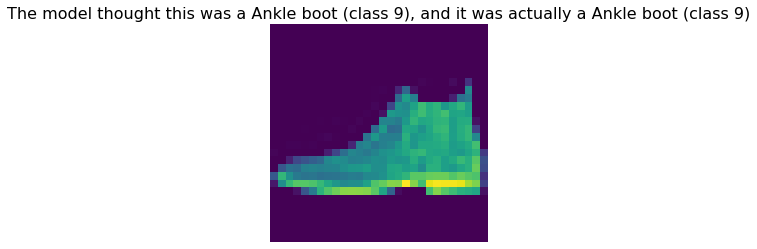

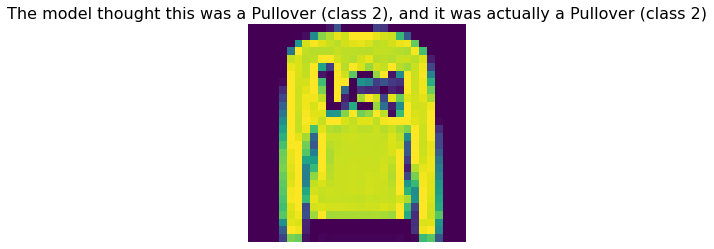

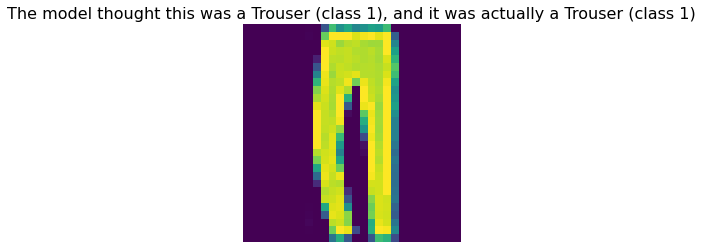

In [23]:
for i in range(0, 3):
    show(i, "The model thought this was a {} (class {}), and it was actually a {} (class {})".format(
        class_names[np.argmax(predictions[i])], np.argmax(predictions[i]), class_names[test_labels[i]], test_labels[i]
    ))